# Hotel Booking Demand -EDA AND PREDICTION

**Task : To predict the possibilty of a booking** 

![](https://hire.refactored.ai/upload-nct/portfolio_images/137/capture%20111.png)

# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline


# LOADING THE DATASET

In [2]:
data=pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')



In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.describe()      #description of dataset 

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
data.shape   #119390 rows and 32 columns

(119390, 32)

In [7]:
data.value_counts()


hotel         is_canceled  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  meal  country  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  agent  company  days_in_waiting_list  customer_type    adr     required_car_parking_spaces  total_of_special_requests  reservation_status  reservation_status_date
City Hotel    0            256        2016               October             43                        16                         2                        3                     2       0.0       0       BB    DEU      Online TA       TA/TO                 0                  0                       0                               A                   A                   0                No Deposit    9.0    333.0    0                

In [8]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**Checking Null Values**



In [10]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
data.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [12]:
data.isnull().all()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False


# Exploratory Data Analysis

**HISTOGRAM**

 **A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.**


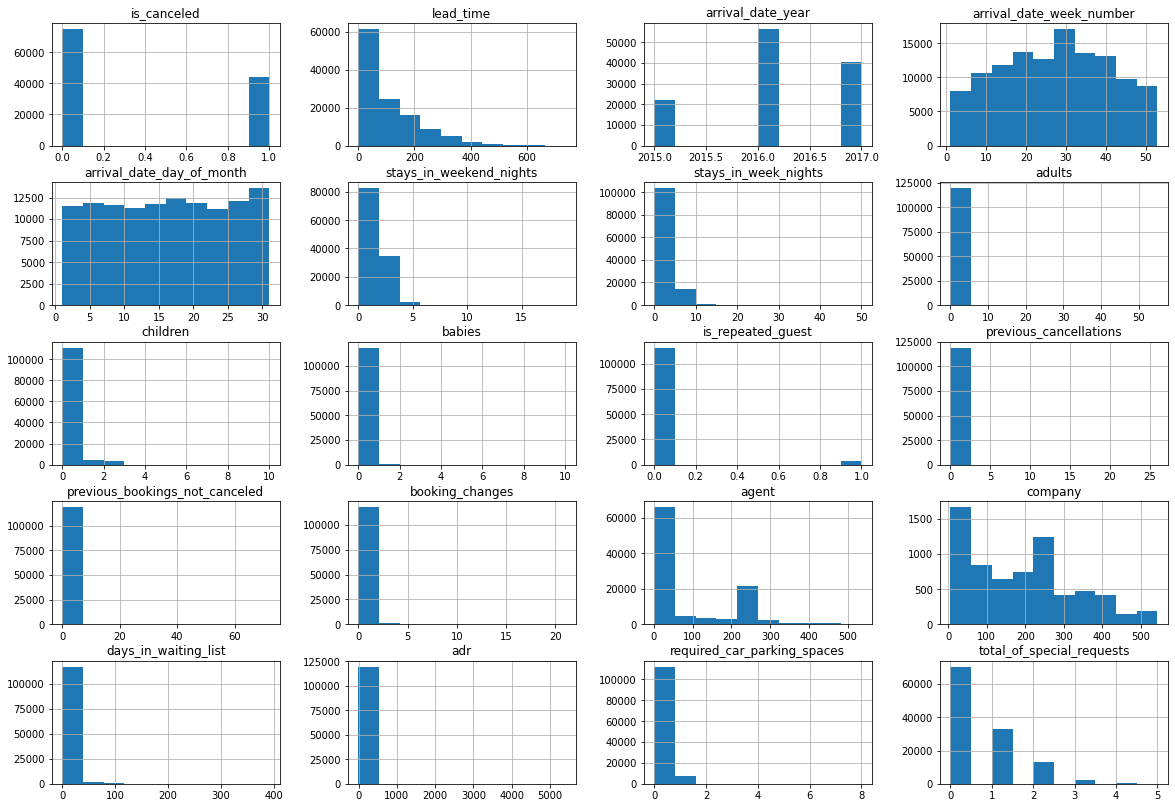

In [13]:
data.hist(figsize=(20,14))
plt.show()



**BOXPLOT**

**A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.**

<AxesSubplot:xlabel='children', ylabel='company'>

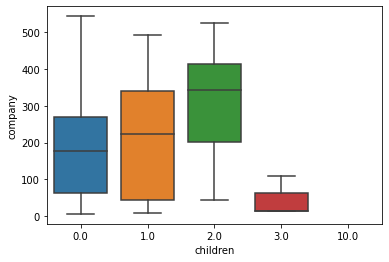

In [14]:
sns.boxplot(x='children',y='company',data=data)

**STRIPPLOT**

**A strip plot is a graphical data anlysis technique for summarizing a univariate data set. ... The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets).**

<AxesSubplot:xlabel='company', ylabel='hotel'>

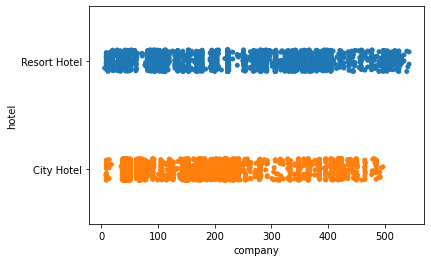

In [15]:
sns.stripplot(x='company',y='hotel',data=data)

**JOINTPLOT**

**Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid.**



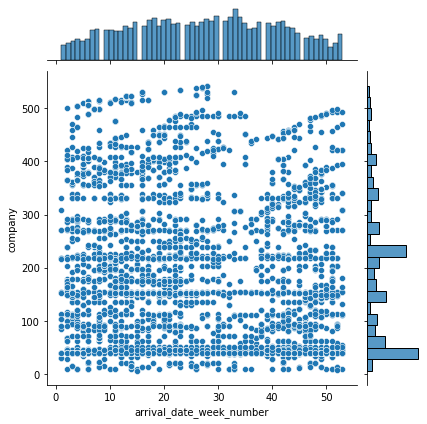

In [16]:
sns.jointplot(x='arrival_date_week_number', y= 'company', data=data)


**RELPLOT**

**This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. ... relplot() combines a FacetGrid with one of two axes-level functions: scatterplot() (with kind="scatter" ; the default)**


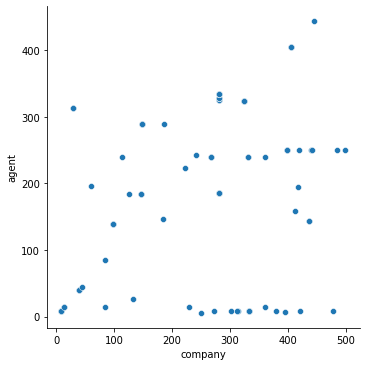

In [17]:
sns.relplot(x='company',y='agent',data=data)

**LINEPLOT**

**A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.**


<AxesSubplot:xlabel='company', ylabel='agent'>

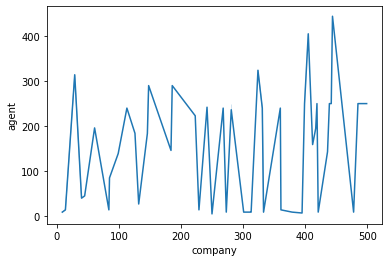

In [18]:
sns.lineplot(x='company',y='agent',data=data)

**REGPLOT**

**This method is used to plot data and a linear regression model fit. ... If strings, these should correspond with column names in “data”. When pandas objects are used, axes will be labeled with the series name. data: This is dataframe where each column is a variable and each row is an observation.**

<AxesSubplot:xlabel='company', ylabel='agent'>

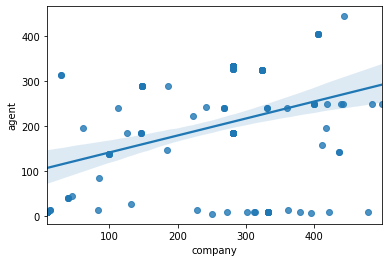

In [19]:
sns.regplot(x='company',y='agent',data=data)

**CATPLOT**

**Catplot is a relatively new addition to Seaborn that simplifies plotting that involves categorical variables. In Seaborn version v0. 9.0 that came out in July 2018, changed the older factor plot to catplot to make it more consistent with terminology in pandas and in seaborn.**

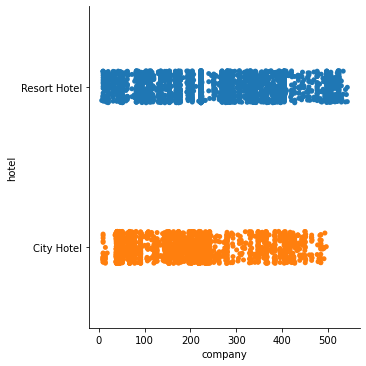

In [20]:
sns.catplot(x='company',y='hotel',data=data)

**SCATTER PLOT**

**A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.**

<AxesSubplot:xlabel='company', ylabel='agent'>

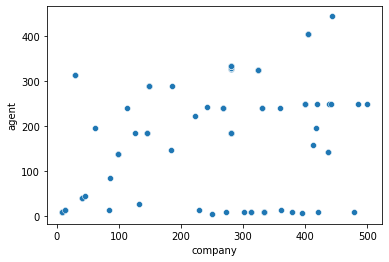

In [21]:
sns.scatterplot(x='company',y='agent',data=data)


**KDE PLOT (DENSITY PLOT)**

**KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization.**

<AxesSubplot:xlabel='company', ylabel='agent'>

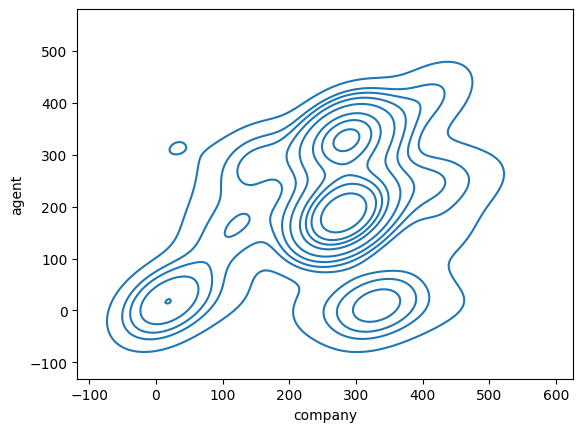

In [22]:
plt.style.use("default")
sns.kdeplot(x='company',y='agent',data=data)

**VIOLIN PLOT**

**A violin plot is a method of plotting numeric data. ... While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data. The difference is particularly useful when the data distribution is multimodal (more than one peak).**


<AxesSubplot:xlabel='company', ylabel='hotel'>

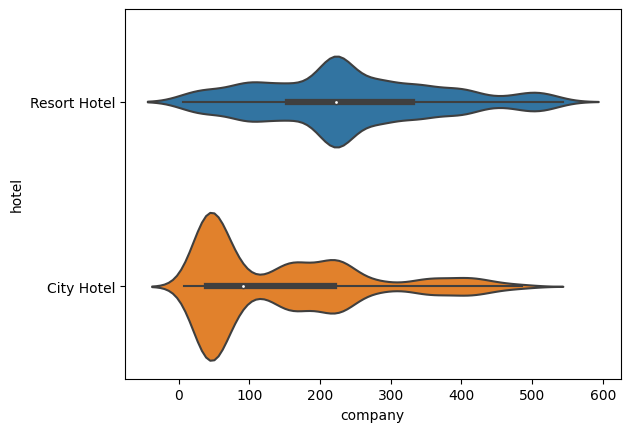

In [23]:
sns.violinplot(x='company',y='hotel',data=data)

**LMPLOT**

**Plot data and regression model fits across a FacetGrid. This function combines regplot() and FacetGrid . It is intended as a convenient interface to fit regression models across conditional subsets of a dataset. ... However, always think about your particular dataset and the goals of the visualization you are creating.**


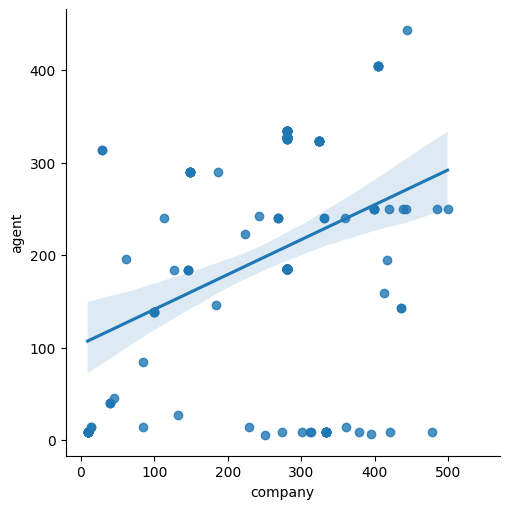

In [24]:
sns.lmplot(x='company',y='agent',data=data)

<AxesSubplot:>

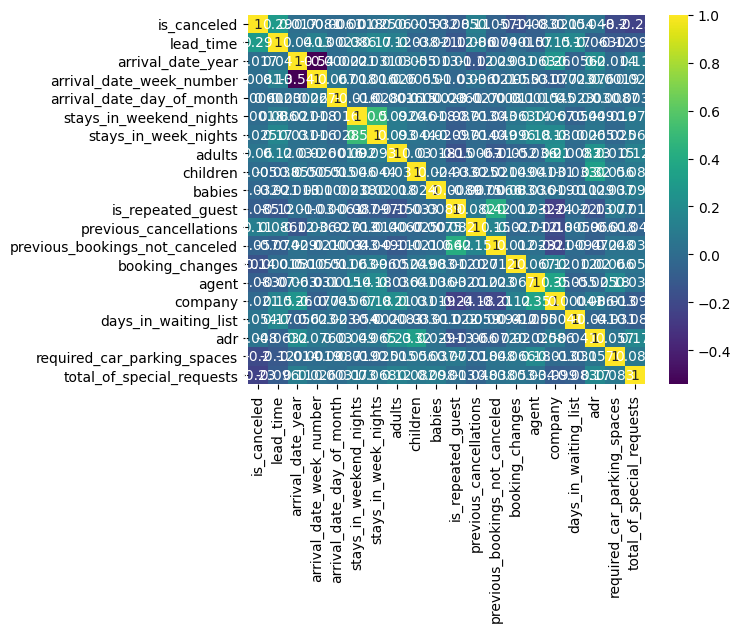

In [25]:
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')



In [26]:
data=data.drop(['country','agent','company'],axis=1)


In [27]:
data=data.dropna()


In [28]:
data.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [29]:
data['hotel'].unique()





array(['Resort Hotel', 'City Hotel'], dtype=object)

In [30]:
data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [31]:
data['arrival_date_month'].unique()


array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [32]:
#lets find the categorialfeatures
list_1=list(data.columns)


In [33]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)


In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [35]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])


In [36]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,2,3,0,0,2,0.00,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,2,4,0,0,2,0.00,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,2,0,0,0,2,75.00,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,2,75.00,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,2,98.00,0,1,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,...,0,0,0,0,2,96.14,0,0,1,919
119386,0,0,102,2017,1,35,31,2,5,3,...,4,0,0,0,2,225.43,0,2,1,920
119387,0,0,34,2017,1,35,31,2,5,2,...,3,0,0,0,2,157.71,0,4,1,920
119388,0,0,109,2017,1,35,31,2,5,2,...,0,0,0,0,2,104.40,0,0,1,920


In [37]:

y=data['hotel']
x=data.drop('hotel',axis=1)






# TRAINING AND TESTING DATA

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)


In [39]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

95508
23878
95508
23878


# MODELS

# 1. Logistic Regression

**Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).**


In [40]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)                         


LogisticRegression()

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
y_pred_reg=reg.predict(x_test)
acc_reg = accuracy_score(y_test, y_pred_reg)
print("Classification Report is:\n",classification_report(y_test,y_pred_reg))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_reg))
print("Training Score:\n",reg.score(x_train,y_train)*100)
print(f"Accuracy Score of Logistic Regression is : {acc_reg}")




Classification Report is:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83     15891
           1       0.70      0.45      0.55      7987

    accuracy                           0.75     23878
   macro avg       0.73      0.68      0.69     23878
weighted avg       0.74      0.75      0.74     23878

Confusion Matrix:
 [[14381  1510]
 [ 4407  3580]]
Training Score:
 75.49943460233698
Accuracy Score of Logistic Regression is : 0.7521986766060809


# 2. KNeighborsClassifier

**By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points.**

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


Accuracy Score of KNN is : 0.8818996565876539
Confusion Matrix : 
[[14897   994]
 [ 1826  6161]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     15891
           1       0.86      0.77      0.81      7987

    accuracy                           0.88     23878
   macro avg       0.88      0.85      0.86     23878
weighted avg       0.88      0.88      0.88     23878



# 3. DECISION TREE CLASSIFIER

**Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. ... The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.**


In [43]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [44]:
y_pred=dtree.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[14919   972]
 [ 2448  5539]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     15891
           1       0.85      0.69      0.76      7987

    accuracy                           0.86     23878
   macro avg       0.85      0.82      0.83     23878
weighted avg       0.86      0.86      0.85     23878



0.8567719239467292

 # 4.Random Forest Classifier


**A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.**

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
y_pred=rfc.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score


[[15574   317]
 [  499  7488]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     15891
           1       0.96      0.94      0.95      7987

    accuracy                           0.97     23878
   macro avg       0.96      0.96      0.96     23878
weighted avg       0.97      0.97      0.97     23878



0.9658262836083424

# 5. AdaBoostClassifier

**An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.**


In [47]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)


AdaBoostClassifier()

In [48]:
y_pred=adb.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[14867  1024]
 [ 2121  5866]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.90     15891
           1       0.85      0.73      0.79      7987

    accuracy                           0.87     23878
   macro avg       0.86      0.84      0.85     23878
weighted avg       0.87      0.87      0.87     23878



0.868288801407153

# 6. Gradient Boosting Classifier

**Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.**


In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)


GradientBoostingClassifier()

In [50]:
y_pred=gbc.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[15217   674]
 [ 1601  6386]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     15891
           1       0.90      0.80      0.85      7987

    accuracy                           0.90     23878
   macro avg       0.90      0.88      0.89     23878
weighted avg       0.90      0.90      0.90     23878



0.9047240137364938

# 7. XGBClassifier

**XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.**


In [51]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)


[15:47:13] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1,
              objective='reg:linear', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
y_pred=xgb.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[15422   469]
 [ 3959  4028]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.87     15891
           1       0.90      0.50      0.65      7987

    accuracy                           0.81     23878
   macro avg       0.85      0.74      0.76     23878
weighted avg       0.83      0.81      0.80     23878



0.8145573331099757

# 8. ExtraTreesClassifier

**Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.**

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)


ExtraTreesClassifier(random_state=0)

In [54]:
y_pred=etc.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[15526   365]
 [  542  7445]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     15891
           1       0.95      0.93      0.94      7987

    accuracy                           0.96     23878
   macro avg       0.96      0.95      0.96     23878
weighted avg       0.96      0.96      0.96     23878



0.9620152441578022

# 9.Bagging Classifier

**A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. ... The base estimator to fit on random subsets of the dataset.**


In [55]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)


0.9589580366864896

In [56]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


,Actual,Predicted
117018,0,0
107541,0,0
56907,0,0
26114,1,1
42024,0,0
...,...,...
55160,0,0
78598,0,0
98604,0,0
64854,0,0


# CONCLUSION : 

**So we get a accuracy score of 97 % using the Random Forest Classifier which is highest among all models** 

***If you liked this notebook, please UPVOTE it.***